In [1]:
import gym
from gym import spaces
import numpy as np
from stable_baselines3 import PPO
import pygame

from overcookedPlus.utils.utils import key2action
from overcookedPlus.env_creater import create_env

env = create_env(preset="easy", n_agent=1, GUI=False, obs_mode="vector")
env.reset()
done = False
model = PPO('MlpPolicy', env, verbose=1)


Using cuda device
Wrapping the env with a `Monitor` wrapper
Wrapping the env in a DummyVecEnv.


c:\Users\pureb\anaconda3\envs\GA\lib\site-packages\gym\utils\passive_env_checker.py:174: UserWarning: WARN: Future gym versions will require that `Env.reset` can be passed a `seed` instead of using `Env.seed` for resetting the environment random number generator.
  logger.warn(
c:\Users\pureb\anaconda3\envs\GA\lib\site-packages\gym\utils\passive_env_checker.py:187: UserWarning: WARN: Future gym versions will require that `Env.reset` can be passed `options` to allow the environment initialisation to be passed additional information.
  logger.warn(
c:\Users\pureb\anaconda3\envs\GA\lib\site-packages\gym\utils\passive_env_checker.py:195: UserWarning: WARN: The result returned by `env.reset()` was not a tuple of the form `(obs, info)`, where `obs` is a observation and `info` is a dictionary containing additional information. Actual type: `<class 'numpy.ndarray'>`
  logger.warn(
c:\Users\pureb\anaconda3\envs\GA\lib\site-packages\stable_baselines3\common\vec_env\patch_gym.py:49: UserWarning: 

In [2]:
model.learn(total_timesteps=100000)


c:\Users\pureb\anaconda3\envs\GA\lib\site-packages\gym\utils\passive_env_checker.py:219: DeprecationWarning: WARN: Core environment is written in old step API which returns one bool instead of two. It is recommended to rewrite the environment with new step API. 
  logger.deprecation(
c:\Users\pureb\anaconda3\envs\GA\lib\site-packages\gym\utils\passive_env_checker.py:225: DeprecationWarning: `np.bool8` is a deprecated alias for `np.bool_`.  (Deprecated NumPy 1.24)
  if not isinstance(done, (bool, np.bool8)):
c:\Users\pureb\anaconda3\envs\GA\lib\site-packages\gym\utils\passive_env_checker.py:141: UserWarning: WARN: The obs returned by the `step()` method was expecting numpy array dtype to be float32, actual type: float64
  logger.warn(
c:\Users\pureb\anaconda3\envs\GA\lib\site-packages\gym\utils\passive_env_checker.py:165: UserWarning: WARN: The obs returned by the `step()` method is not within the observation space.
  logger.warn(f"{pre} is not within the observation space.")


---------------------------------
| rollout/           |          |
|    ep_len_mean     | 200      |
|    ep_rew_mean     | 61.3     |
| time/              |          |
|    fps             | 589      |
|    iterations      | 1        |
|    time_elapsed    | 3        |
|    total_timesteps | 2048     |
---------------------------------
-----------------------------------------
| rollout/                |             |
|    ep_len_mean          | 200         |
|    ep_rew_mean          | 110         |
| time/                   |             |
|    fps                  | 555         |
|    iterations           | 2           |
|    time_elapsed         | 7           |
|    total_timesteps      | 4096        |
| train/                  |             |
|    approx_kl            | 0.011501589 |
|    clip_fraction        | 0.192       |
|    clip_range           | 0.2         |
|    entropy_loss         | -1.6        |
|    explained_variance   | 0.00414     |
|    learning_rate        | 0.

In [4]:
env = create_env(preset="easy", n_agent=1, GUI=True, obs_mode="vector")


In [5]:
obs = env.reset()
for i in range(100):
    action, _states = model.predict(obs, deterministic=True)
    obs, reward, done, info = env.step(action)
    if done:
        obs = env.reset()

c:\Users\pureb\anaconda3\envs\GA\lib\site-packages\gym\utils\passive_env_checker.py:174: UserWarning: WARN: Future gym versions will require that `Env.reset` can be passed a `seed` instead of using `Env.seed` for resetting the environment random number generator.
  logger.warn(
c:\Users\pureb\anaconda3\envs\GA\lib\site-packages\gym\utils\passive_env_checker.py:187: UserWarning: WARN: Future gym versions will require that `Env.reset` can be passed `options` to allow the environment initialisation to be passed additional information.
  logger.warn(
c:\Users\pureb\anaconda3\envs\GA\lib\site-packages\gym\utils\passive_env_checker.py:195: UserWarning: WARN: The result returned by `env.reset()` was not a tuple of the form `(obs, info)`, where `obs` is a observation and `info` is a dictionary containing additional information. Actual type: `<class 'numpy.ndarray'>`
  logger.warn(
c:\Users\pureb\anaconda3\envs\GA\lib\site-packages\gym\utils\passive_env_checker.py:219: DeprecationWarning: WARN:

In [ ]:
obs=env.reset()


In [ ]:

while not done:
    for event in pygame.event.get():
        if event.type == pygame.QUIT:
            done = True
        elif event.type == pygame.KEYDOWN:
            key = pygame.key.name(event.key)
            print(f"Key: {key}")
            action = key2action(key)
            if action is not None:
                new_obs, reward, done, info = env.step([action])
                print(f"Reward: {reward}, Done: {done}, Info: {info}")
                obs = new_obs
pygame.quit()

In [ ]:
env.render()
env.reset()
env.render()

array([[[114,  93,  51],
        [114,  93,  51],
        [114,  93,  51],
        ...,
        [114,  93,  51],
        [114,  93,  51],
        [114,  93,  51]],

       [[114,  93,  51],
        [220, 170, 110],
        [220, 170, 110],
        ...,
        [220, 170, 110],
        [220, 170, 110],
        [114,  93,  51]],

       [[114,  93,  51],
        [220, 170, 110],
        [220, 170, 110],
        ...,
        [220, 170, 110],
        [220, 170, 110],
        [114,  93,  51]],

       ...,

       [[114,  93,  51],
        [220, 170, 110],
        [220, 170, 110],
        ...,
        [220, 170, 110],
        [220, 170, 110],
        [114,  93,  51]],

       [[114,  93,  51],
        [220, 170, 110],
        [220, 170, 110],
        ...,
        [220, 170, 110],
        [220, 170, 110],
        [114,  93,  51]],

       [[114,  93,  51],
        [114,  93,  51],
        [114,  93,  51],
        ...,
        [114,  93,  51],
        [114,  93,  51],
        [114,  93,  51]]

In [ ]:
env.discount

1

In [1]:
import gym
from gym import spaces
import numpy as np
from stable_baselines3 import PPO
import pygame

from overcookedPlus.utils.utils import key2action
from overcookedPlus.env_creater import create_env

env = create_env(preset="easy", n_agent=1, GUI=False, obs_mode="vector")

In [ ]:
obs=env.reset()

c:\Users\pureb\anaconda3\envs\GA\lib\site-packages\gym\utils\passive_env_checker.py:174: UserWarning: WARN: Future gym versions will require that `Env.reset` can be passed a `seed` instead of using `Env.seed` for resetting the environment random number generator.
  logger.warn(
c:\Users\pureb\anaconda3\envs\GA\lib\site-packages\gym\utils\passive_env_checker.py:187: UserWarning: WARN: Future gym versions will require that `Env.reset` can be passed `options` to allow the environment initialisation to be passed additional information.
  logger.warn(
c:\Users\pureb\anaconda3\envs\GA\lib\site-packages\gym\utils\passive_env_checker.py:195: UserWarning: WARN: The result returned by `env.reset()` was not a tuple of the form `(obs, info)`, where `obs` is a observation and `info` is a dictionary containing additional information. Actual type: `<class 'numpy.ndarray'>`
  logger.warn(


In [ ]:
obs.shape

(400, 400, 3)

In [ ]:
env.observation_space

Box(0.0, 1.0, (27,), float32)

In [ ]:
obs.shape

(27,)

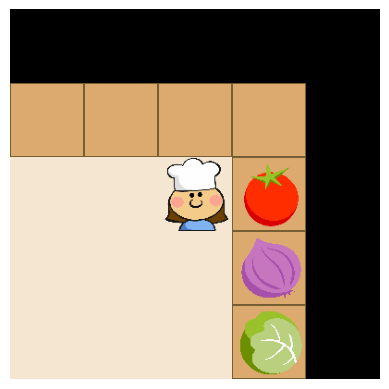

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# 显示图像
plt.imshow(obs)
plt.axis('off')  # 不显示坐标轴
plt.show()

In [1]:
import pygame
import gym
import numpy as np
import matplotlib.pyplot as plt
from overcookedPlus.env_creater import create_env
from overcookedPlus.utils.utils import key2action

env = create_env(preset="hard", n_agent=1, GUI=True)

done = False
obs = env.reset()



pygame 2.5.2 (SDL 2.28.3, Python 3.10.14)
Hello from the pygame community. https://www.pygame.org/contribute.html


c:\Users\pureb\anaconda3\envs\GA\lib\site-packages\gym\utils\passive_env_checker.py:174: UserWarning: WARN: Future gym versions will require that `Env.reset` can be passed a `seed` instead of using `Env.seed` for resetting the environment random number generator.
  logger.warn(
c:\Users\pureb\anaconda3\envs\GA\lib\site-packages\gym\utils\passive_env_checker.py:187: UserWarning: WARN: Future gym versions will require that `Env.reset` can be passed `options` to allow the environment initialisation to be passed additional information.
  logger.warn(
c:\Users\pureb\anaconda3\envs\GA\lib\site-packages\gym\utils\passive_env_checker.py:195: UserWarning: WARN: The result returned by `env.reset()` was not a tuple of the form `(obs, info)`, where `obs` is a observation and `info` is a dictionary containing additional information. Actual type: `<class 'numpy.ndarray'>`
  logger.warn(


In [2]:
done=False
while not done:
    for event in pygame.event.get():
        if event.type == pygame.QUIT:
            done = True
        elif event.type == pygame.KEYDOWN:
            key = pygame.key.name(event.key)
            print(f"Key: {key}")
            action = key2action(key)
            if action is not None:
                new_obs, reward, done, info = env.step([action])
                print(f"Reward: {reward}, Done: {done}, Info: {info}")

            

Key: left alt
Key: s


c:\Users\pureb\anaconda3\envs\GA\lib\site-packages\gym\utils\passive_env_checker.py:219: DeprecationWarning: WARN: Core environment is written in old step API which returns one bool instead of two. It is recommended to rewrite the environment with new step API. 
  logger.deprecation(
c:\Users\pureb\anaconda3\envs\GA\lib\site-packages\gym\utils\passive_env_checker.py:225: DeprecationWarning: `np.bool8` is a deprecated alias for `np.bool_`.  (Deprecated NumPy 1.24)
  if not isinstance(done, (bool, np.bool8)):
c:\Users\pureb\anaconda3\envs\GA\lib\site-packages\gym\utils\passive_env_checker.py:141: UserWarning: WARN: The obs returned by the `step()` method was expecting numpy array dtype to be float32, actual type: float64
  logger.warn(
c:\Users\pureb\anaconda3\envs\GA\lib\site-packages\gym\utils\passive_env_checker.py:165: UserWarning: WARN: The obs returned by the `step()` method is not within the observation space.
  logger.warn(f"{pre} is not within the observation space.")


Reward: -0.1, Done: False, Info: {'cur_mac': [1], 'mac_done': [True]}
Key: a
Reward: -0.1, Done: False, Info: {'cur_mac': [2], 'mac_done': [True]}
Key: w
Reward: -0.1, Done: False, Info: {'cur_mac': [3], 'mac_done': [True]}
Key: d
Reward: -0.1, Done: False, Info: {'cur_mac': [0], 'mac_done': [True]}
Key: d
Reward: -0.1, Done: False, Info: {'cur_mac': [0], 'mac_done': [True]}
Key: a
Reward: -0.1, Done: False, Info: {'cur_mac': [2], 'mac_done': [True]}
Key: a
Reward: -0.1, Done: False, Info: {'cur_mac': [2], 'mac_done': [True]}
Key: w
Reward: -0.1, Done: False, Info: {'cur_mac': [3], 'mac_done': [True]}
Key: w
Reward: -0.1, Done: False, Info: {'cur_mac': [3], 'mac_done': [True]}
Key: w
Reward: -0.1, Done: False, Info: {'cur_mac': [3], 'mac_done': [True]}
Key: w
Reward: 10, Done: False, Info: {'cur_mac': [3], 'mac_done': [True]}
Key: w
Reward: -0.1, Done: False, Info: {'cur_mac': [3], 'mac_done': [True]}
Key: s
Reward: -0.1, Done: False, Info: {'cur_mac': [1], 'mac_done': [True]}
Key: s
R

In [3]:
env.render()

array([[[114,  93,  51],
        [114,  93,  51],
        [114,  93,  51],
        ...,
        [114,  93,  51],
        [114,  93,  51],
        [114,  93,  51]],

       [[114,  93,  51],
        [220, 170, 110],
        [220, 170, 110],
        ...,
        [220, 170, 110],
        [220, 170, 110],
        [114,  93,  51]],

       [[114,  93,  51],
        [220, 170, 110],
        [220, 170, 110],
        ...,
        [220, 170, 110],
        [220, 170, 110],
        [114,  93,  51]],

       ...,

       [[114,  93,  51],
        [220, 170, 110],
        [220, 170, 110],
        ...,
        [220, 170, 110],
        [220, 170, 110],
        [114,  93,  51]],

       [[114,  93,  51],
        [220, 170, 110],
        [220, 170, 110],
        ...,
        [220, 170, 110],
        [220, 170, 110],
        [114,  93,  51]],

       [[114,  93,  51],
        [114,  93,  51],
        [114,  93,  51],
        ...,
        [114,  93,  51],
        [114,  93,  51],
        [114,  93,  51]]

In [14]:
env.preceptionManager.oneHotTask

[0, 0, 1, 0, 1, 1, 0, 0]

In [15]:
env.taskManager.tasks

[{'ingredients': ('onion',),
  'task_encoding': [0, 0, 1, 0],
  'task_start_time': 0,
  'task_end_time': 0},
 {'ingredients': ('tomato', 'lettuce'),
  'task_encoding': [1, 1, 0, 0],
  'task_start_time': 35,
  'task_end_time': 0}]

In [ ]:

pygame.quit()


plt.figure()
plt.title("Reward Curve")
plt.xlabel("Steps")
plt.ylabel("Reward")
for agent in env.agent:
    plt.plot(agent.reward, label=f"Agent {agent.color}")
plt.legend()
plt.show()
